# ECE 763 Project 03

In [1]:
import src.architecture as model
from torchsummary import summary
import src.utils as utils

## Step 1 Data Preprocessing 
Data Normalization


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


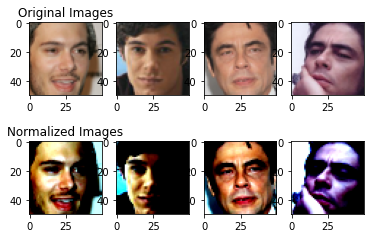

In [2]:
# mean and std of the faceScrub dataset
mean = [0.5349595, 0.43266356, 0.38429603]
std=[0.30181888, 0.26441157, 0.2580429 ]
utils.visualize_normalization(dir='./data/train', mean=mean, std=std, show = True)


## Step 2: Chosse the arquitecture
Here we are using a vanilla CNN inspired in the AlexNet arquitecture

In [3]:
image_res = 50
net = model.CNN(image_res)
print('Model summary:')
summary(net, input_size=(3, image_res, image_res))

Model summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 46, 46]           1,216
       BatchNorm2d-2           [-1, 16, 46, 46]              32
              ReLU-3           [-1, 16, 46, 46]               0
         MaxPool2d-4           [-1, 16, 23, 23]               0
            Conv2d-5           [-1, 32, 11, 11]          86,560
       BatchNorm2d-6           [-1, 32, 11, 11]              64
              ReLU-7           [-1, 32, 11, 11]               0
         MaxPool2d-8             [-1, 32, 5, 5]               0
            Linear-9                  [-1, 256]         205,056
             ReLU-10                  [-1, 256]               0
           Linear-11                   [-1, 32]           8,224
             ReLU-12                   [-1, 32]               0
           Linear-13                    [-1, 2]              66
Total params: 301,218
Tr

## Step 3: Check the loss is reasonable

Disable regularization

In [4]:
!python main.py --epochs 1 --l2 0.0

Epoch  1 -> train_loss: 0.22035, train_acc: 0.91900 | val_loss: 0.21105, val_acc: 0.92000 | lr: 0.01000


Crank up regularization

In [5]:
!python main.py --epochs 1 --l2 10

Epoch  1 -> train_loss: 0.65625, train_acc: 0.63500 | val_loss: 0.69257, val_acc: 0.50000 | lr: 0.01000


## Step 4: Training

Make sure you can overfit a very small portion of the training data

In [6]:
!python main.py --epochs 5 --new_datasets 1 --train 50 --valid 10 --test 10 --l2 0.0 

Epoch  1 -> train_loss: 0.49485, train_acc: 0.65000 | val_loss: 0.22721, val_acc: 0.95000 | lr: 0.01000
Epoch  2 -> train_loss: 0.27418, train_acc: 0.92000 | val_loss: 0.18564, val_acc: 0.95000 | lr: 0.01000
Epoch  3 -> train_loss: 0.16373, train_acc: 0.93000 | val_loss: 0.12879, val_acc: 0.95000 | lr: 0.01000
Epoch  4 -> train_loss: 0.09885, train_acc: 1.00000 | val_loss: 0.11733, val_acc: 0.95000 | lr: 0.01000
Epoch  5 -> train_loss: 0.08379, train_acc: 0.99000 | val_loss: 0.10149, val_acc: 0.95000 | lr: 0.01000


Start with small regularization and find the learning rate that makes the loss go down

In [7]:
!python main.py --epochs 10 --new_datasets 1 --train 500 --valid 100 --test 100 --lr 0.015 --l2 0.01

Epoch  1 -> train_loss: 0.19852, train_acc: 0.91491 | val_loss: 0.17974, val_acc: 0.94500 | lr: 0.01500
Epoch  2 -> train_loss: 0.04366, train_acc: 0.99099 | val_loss: 0.16849, val_acc: 0.93500 | lr: 0.01500
Epoch  3 -> train_loss: 0.01801, train_acc: 0.99700 | val_loss: 0.19488, val_acc: 0.93000 | lr: 0.01500
Epoch  4 -> train_loss: 0.00932, train_acc: 0.99900 | val_loss: 0.21676, val_acc: 0.92500 | lr: 0.01500
Epoch  5 -> train_loss: 0.00922, train_acc: 1.00000 | val_loss: 0.13190, val_acc: 0.94500 | lr: 0.01500
Epoch  6 -> train_loss: 0.00961, train_acc: 0.99800 | val_loss: 0.15853, val_acc: 0.94000 | lr: 0.01500
Epoch  7 -> train_loss: 0.00451, train_acc: 1.00000 | val_loss: 0.15619, val_acc: 0.94500 | lr: 0.01500
Epoch  8 -> train_loss: 0.00346, train_acc: 1.00000 | val_loss: 0.14313, val_acc: 0.94500 | lr: 0.01500
Epoch  9 -> train_loss: 0.00361, train_acc: 1.00000 | val_loss: 0.17556, val_acc: 0.94000 | lr: 0.01500
Epoch 10 -> train_loss: 0.00309, train_acc: 1.00000 | val_loss: 

## Step 5: Hyperparameter Optimization 

In [8]:
!python main.py --epochs 10 --lr 0.015 --l2 0.01 --momentum 0.9 --lr_decay_rate 0.1 --verbose 3 --suffix hyper

Training samples: 	999
Validation samples: 	200
Device to use is cpu
Model summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 46, 46]           1,216
       BatchNorm2d-2           [-1, 16, 46, 46]              32
              ReLU-3           [-1, 16, 46, 46]               0
         MaxPool2d-4           [-1, 16, 23, 23]               0
            Conv2d-5           [-1, 32, 11, 11]          86,560
       BatchNorm2d-6           [-1, 32, 11, 11]              64
              ReLU-7           [-1, 32, 11, 11]               0
         MaxPool2d-8             [-1, 32, 5, 5]               0
            Linear-9                  [-1, 256]         205,056
             ReLU-10                  [-1, 256]               0
           Linear-11                   [-1, 32]           8,224
             ReLU-12                   [-1, 32]               0
           Linear-1